In [1]:
from google.colab import drive
from pathlib import Path
import os

# Mount Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


1. Niche Consistency Analysis

2. Tissue-Specific Comparison

Loaded shapes:
mm_spatial: (15601, 60)
graph_spatial: (15601, 60)
mm_pred: (540, 13)
graph_pred: (540, 13)

mm_spatial columns: ['spot_id', 'tissue', 'cell_type', 'niche', 'x_coordinate', 'y_coordinate', 'Glycolysis', 'TCA_Cycle', 'Oxidative_Phosphorylation', 'Fatty_Acid_Oxidation', 'Fatty_Acid_Synthesis', 'Pentose_Phosphate_Pathway', 'Amino_Acid_Metabolism', 'One_Carbon_Metabolism', 'Glutamine_Metabolism', 'Serine_Glycine_Metabolism', 'Branched_Chain_Amino_Acids', 'Aromatic_Amino_Acids', 'Arginine_Metabolism', 'Proline_Metabolism', 'Cysteine_Metabolism', 'Threonine_Metabolism', 'Histidine_Metabolism', 'Fatty_Acid_Elongation', 'Fatty_Acid_Desaturation', 'Carnitine_Shuttle', 'Cholesterol_Synthesis', 'Cholesterol_Efflux', 'Sphingolipid_Metabolism', 'Ceramide_Metabolism', 'Purine_Synthesis', 'Pyrimidine_Synthesis', 'Nucleotide_Salvage', 'Nucleotide_Degradation', 'Ribonucleotide_Reductase', 'Folate_Cycle', 'Methionine_Cycle', 'SAM_Cycle', 'One_Carbon_Mitochondrial', 'Glutathione_Metabolism

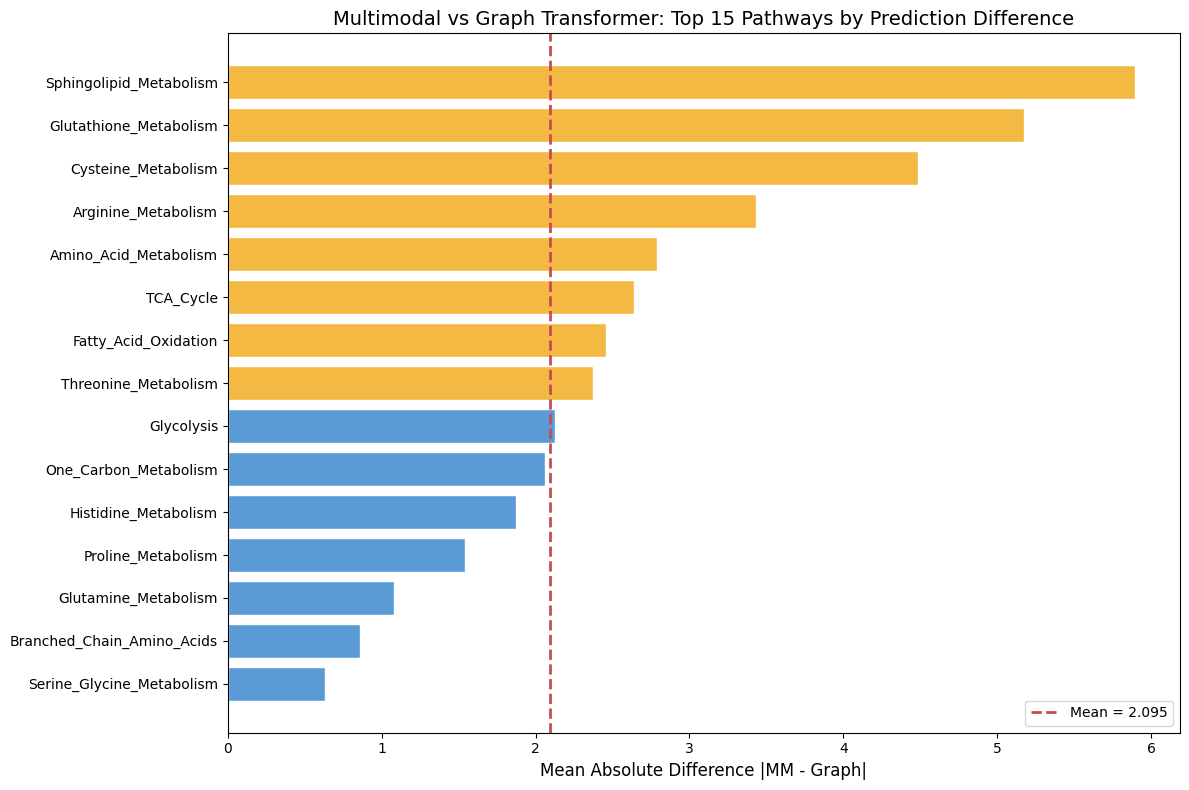

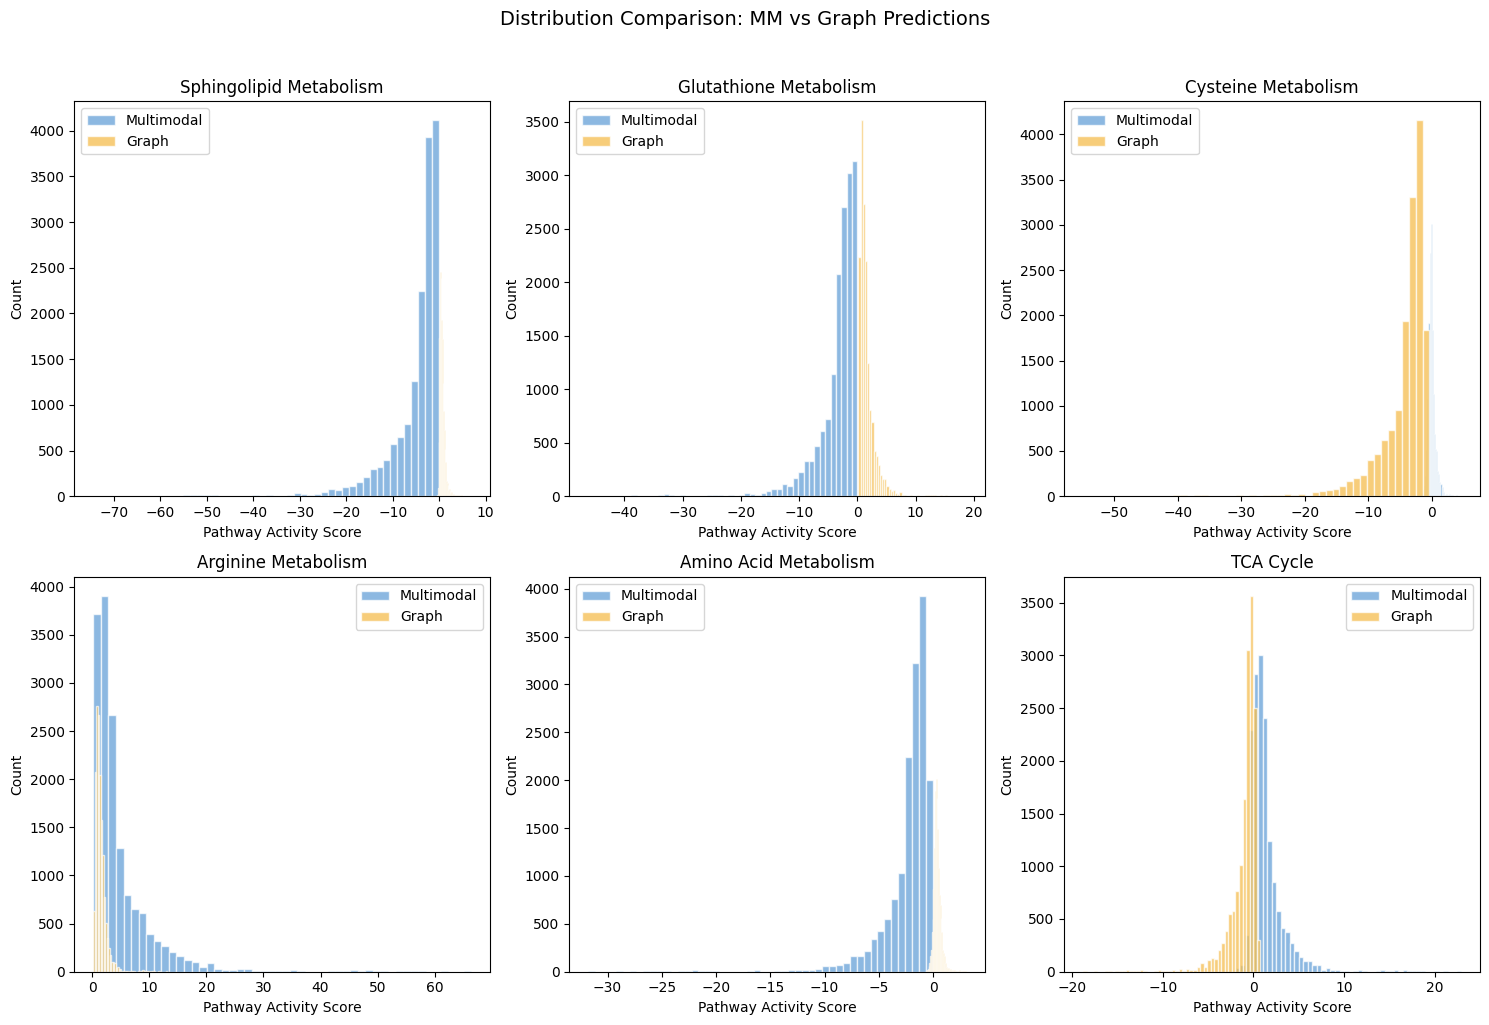

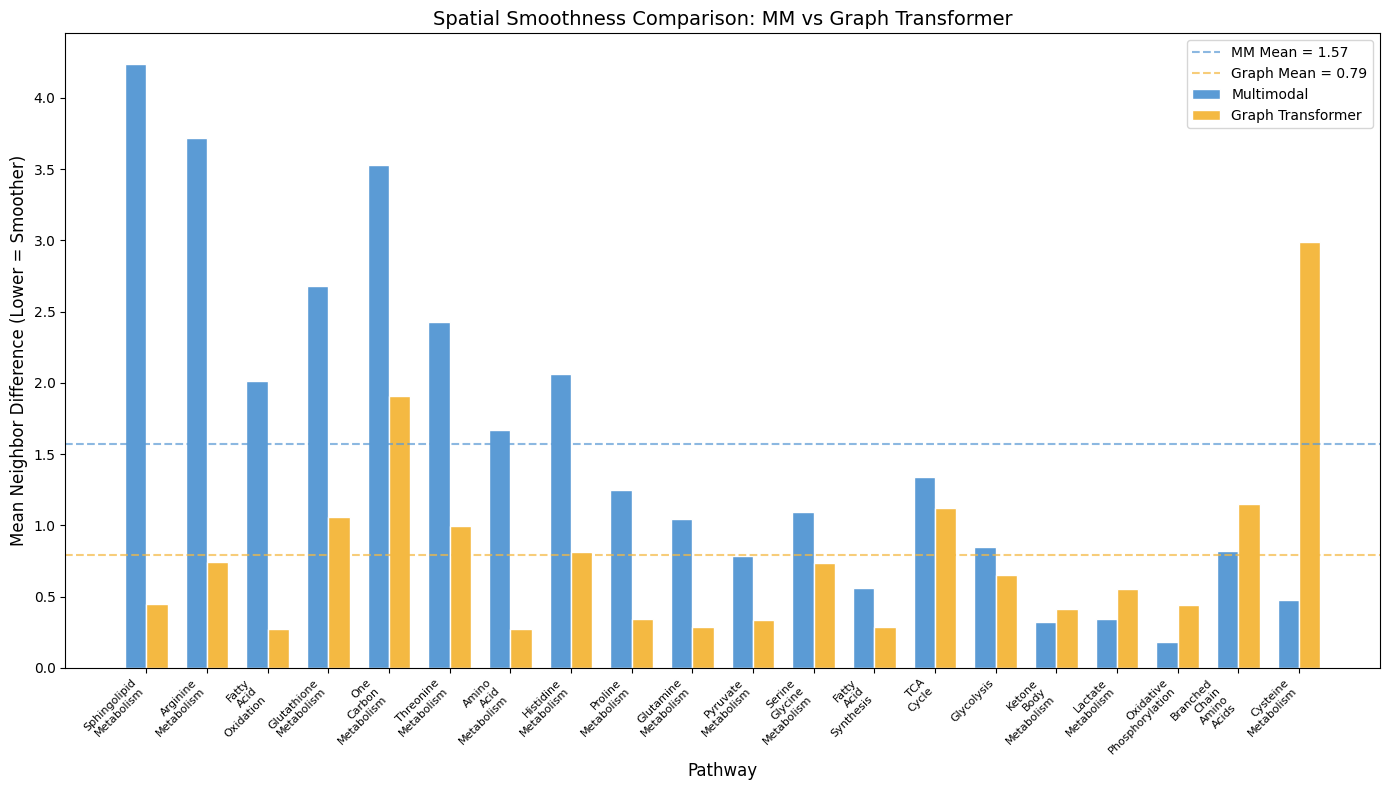


Spatial Smoothness Summary:
                   Pathway  MM_Smoothness  Graph_Smoothness  Improvement_Pct
   Sphingolipid_Metabolism       4.240864          0.451312        89.358010
       Arginine_Metabolism       3.715018          0.741843        80.031241
      Fatty_Acid_Oxidation       2.014403          0.270896        86.552068
    Glutathione_Metabolism       2.678706          1.059078        60.463092
     One_Carbon_Metabolism       3.525823          1.906283        45.933686
      Threonine_Metabolism       2.427079          0.996045        58.961156
     Amino_Acid_Metabolism       1.672609          0.272937        83.681963
      Histidine_Metabolism       2.065730          0.811344        60.723629
        Proline_Metabolism       1.251155          0.345729        72.367181
      Glutamine_Metabolism       1.042435          0.288283        72.345247
       Pyruvate_Metabolism       0.784470          0.334350        57.378824
 Serine_Glycine_Metabolism       1.095180      

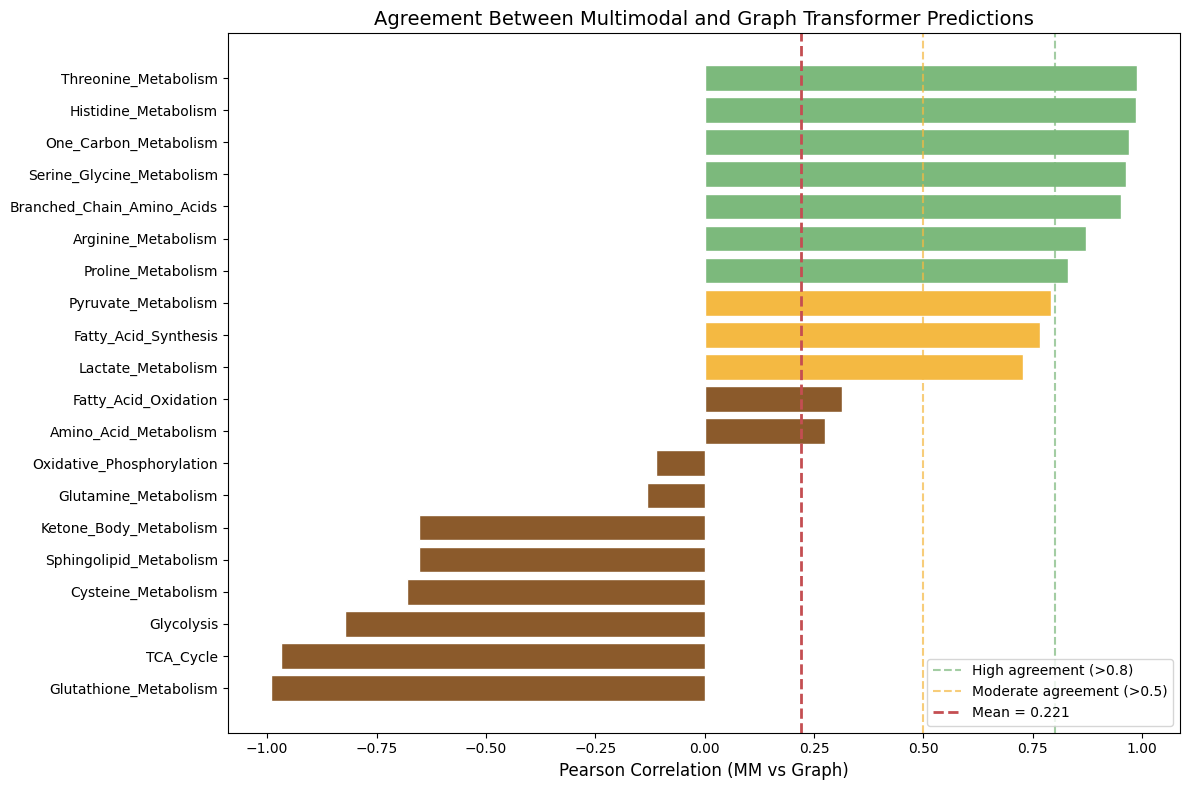

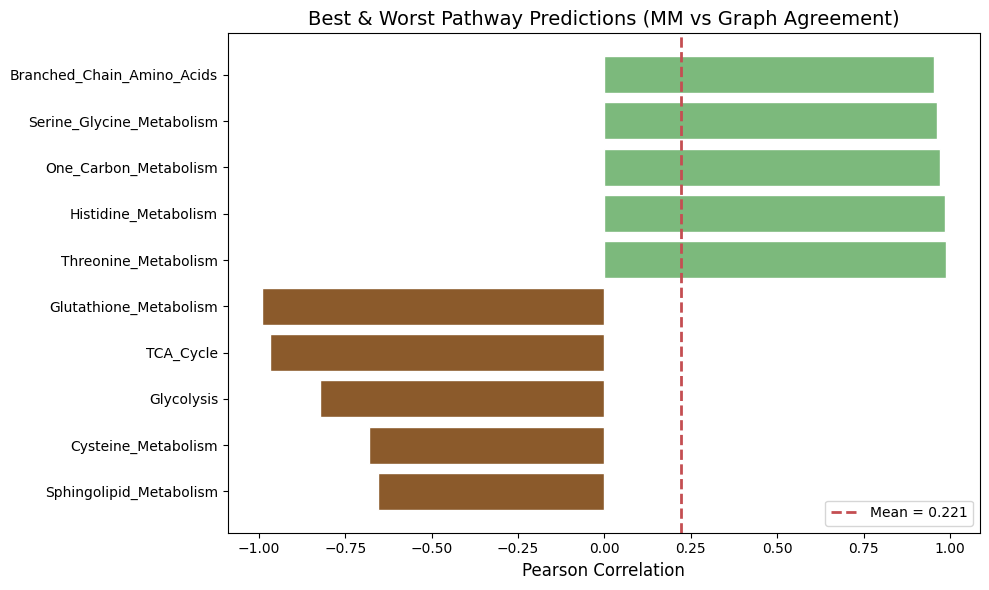

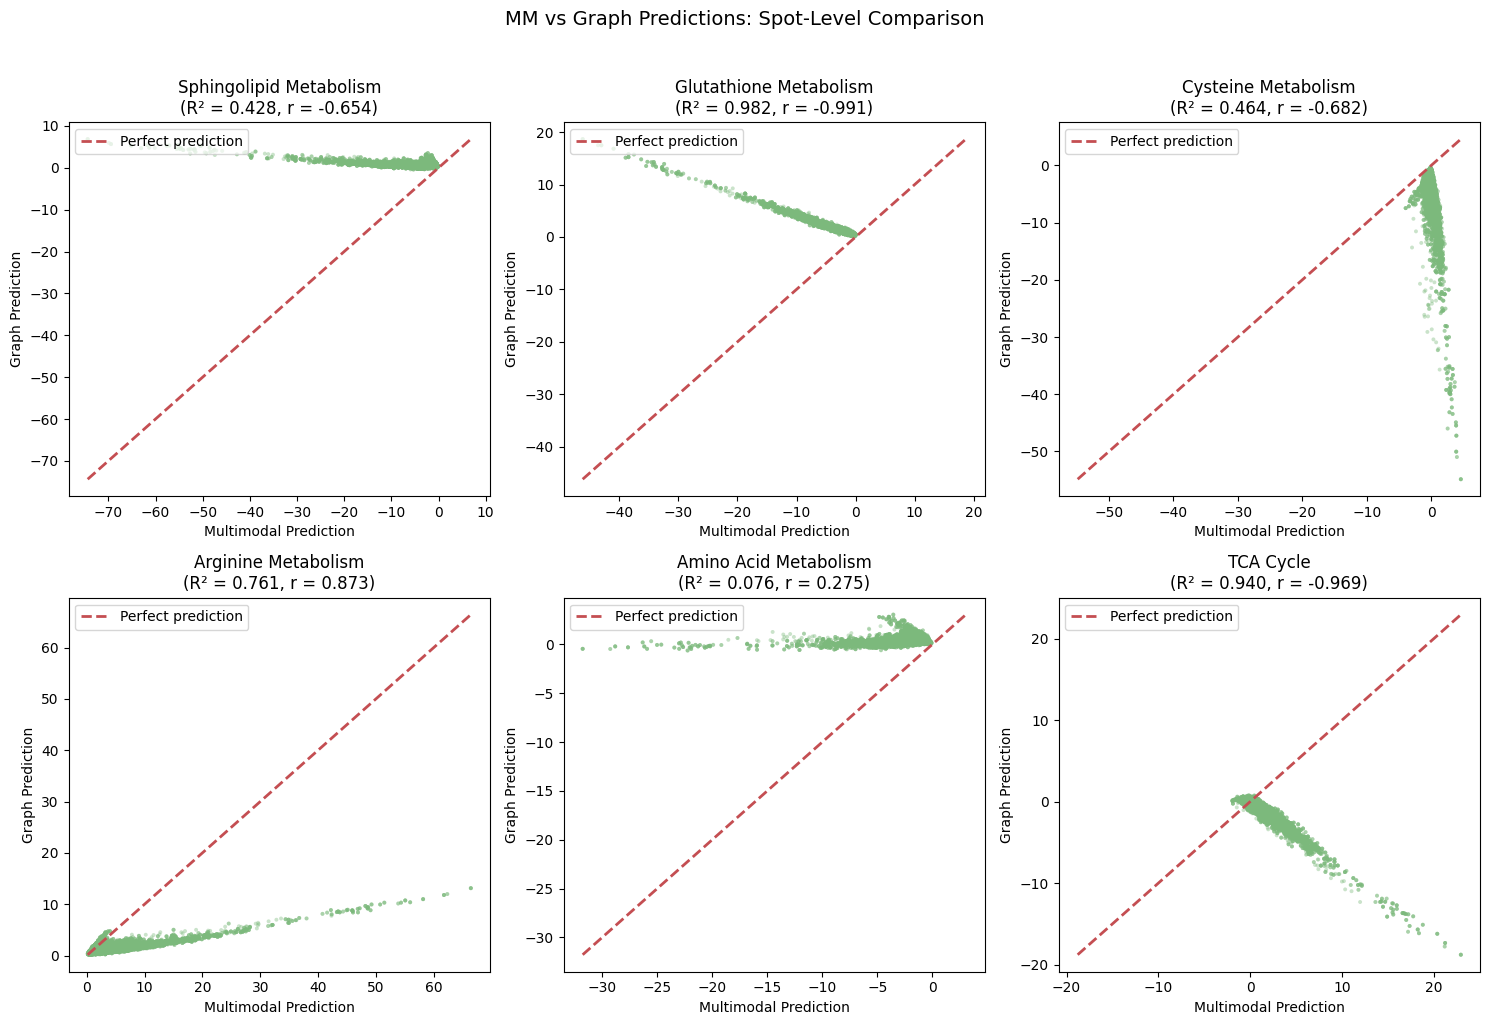


SUMMARY: MM vs Graph Transformer Comparison
Total Spots Compared: 15601
Total Pathways: 20
Mean Correlation: 0.221
Pathways with High Agreement (r>0.8): 7
Pathways with Low Agreement (r<0.5): 10
Mean Smoothness Improvement (%): 4.606
Pathways Smoother in Graph: 15


Cell Type-Specific Analysis:

Epithelial_General: 4677 spots
  Amino_Acid_Metabolism: 2.505
  Arginine_Metabolism: 2.896
  Branched_Chain_Amino_Acids: 0.797
  Cysteine_Metabolism: 3.924
  Fatty_Acid_Oxidation: 2.110

Memory_T_Cells: 107 spots
  Amino_Acid_Metabolism: 14.164
  Arginine_Metabolism: 24.397
  Branched_Chain_Amino_Acids: 3.457
  Cysteine_Metabolism: 27.035
  Fatty_Acid_Oxidation: 15.885

HER2_Enriched: 4287 spots
  Amino_Acid_Metabolism: 2.637
  Arginine_Metabolism: 3.022
  Branched_Chain_Amino_Acids: 0.851
  Cysteine_Metabolism: 4.174
  Fatty_Acid_Oxidation: 2.237

Myofibroblasts: 608 spots
  Amino_Acid_Metabolism: 4.282
  Arginine_Metabolism: 6.790
  Branched_Chain_Amino_Acids: 1.195
  Cysteine_Metabolism: 7.

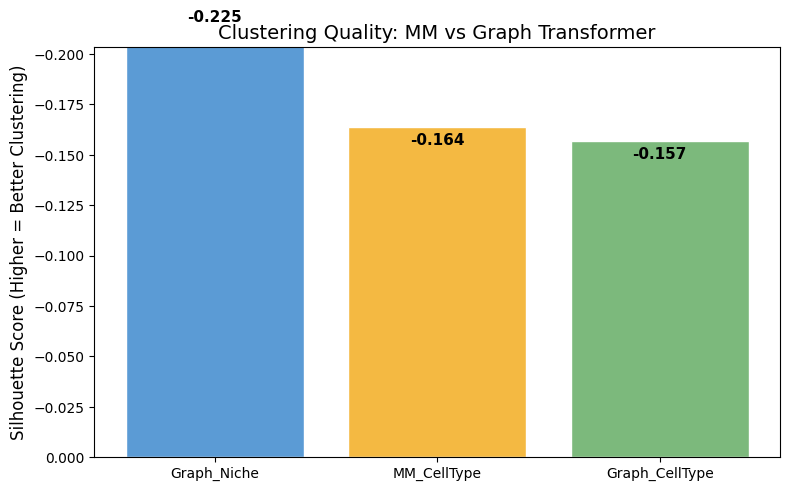


TISSUE-SPECIFIC COMPARISON
          Correlation  MeanAbsDiff
Tissue                            
1142243F        0.149        2.436
1160920F        0.166        2.517
CID4290         0.138        2.210
CID4465         0.128        1.993
CID44971        0.128        2.677
CID4535         0.196        3.216


/tmp/ipython-input-3878158542.py:458: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(tissues, rotation=45, ha='right')
/tmp/ipython-input-3878158542.py:471: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(tissues, rotation=45, ha='right')


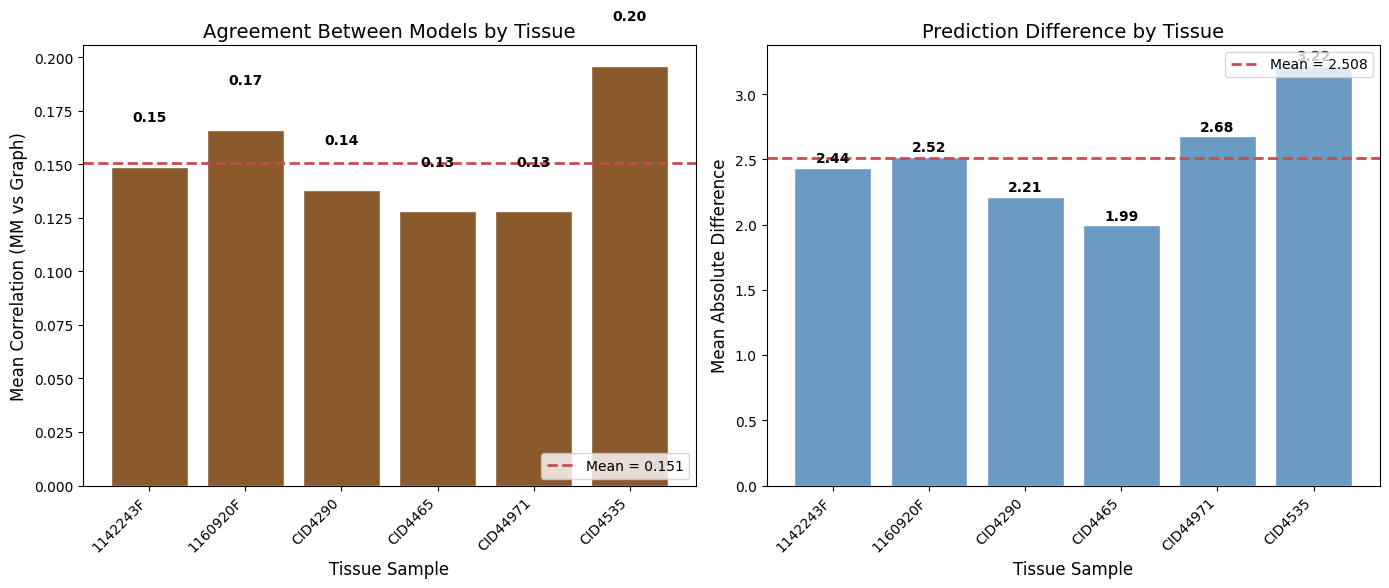

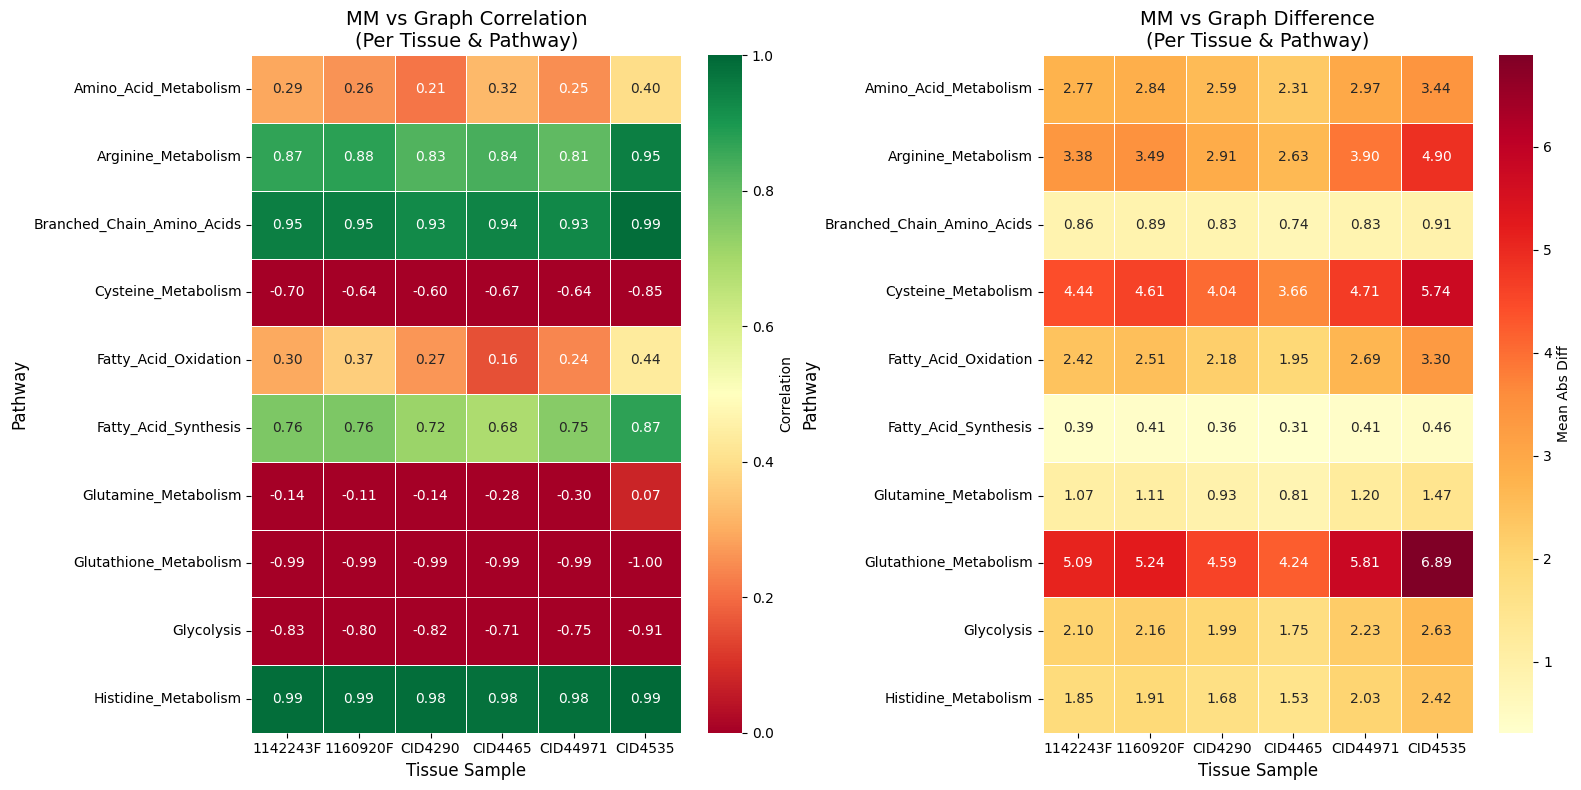


STATISTICAL SIGNIFICANCE TEST

Paired t-test for spatial smoothness:
  t-statistic: 2.633
  p-value: 0.016397
  Significant improvement: Yes (p < 0.05)

INTERPRETATION
• High correlation (>0.8): Models agree well on pathway predictions
• Low correlation (<0.5): Models give different predictions - Graph adds spatial context
• High difference: Graph Transformer refines predictions significantly
• Tissues with low correlation may have more spatial heterogeneity
• Lower smoothness value = spatially coherent predictions


In [8]:
# =========================
# MetaboNiche: MM vs Graph comparison plots (FIXED + NEW COLORS)
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# --------- DEFINE COLOR PALETTE ---------
COLORS = {
    'scatter_green': '#7CB97C',      # Light green for scatter points
    'scatter_blue': '#6B9BC3',       # Light blue for scatter points
    'hist_blue': '#5B9BD5',          # Blue for histograms
    'hist_orange': '#F4B942',        # Orange/yellow for histograms
    'bar_green': '#7CB97C',          # Green for positive/good bars
    'bar_brown': '#8B5A2B',          # Brown for negative/worst bars
    'bar_blue': '#5B9BD5',           # Blue for MM bars
    'bar_coral': '#F4B942',          # Orange for Graph bars
    'line_red': '#C44E52',           # Red dashed line
}

# --------- 1) LOAD FILES ---------
mm_spatial_path = "/content/drive/MyDrive/MSc_Dissertation_MetaboNiche3/testing/mm_spatial_data.csv"
graph_spatial_path = "/content/drive/MyDrive/MSc_Dissertation_MetaboNiche3/testing/graph_spatial_data.csv"
mm_pred_path = "/content/drive/MyDrive/MSc_Dissertation_MetaboNiche3/testing/mm_metabolic_predictions.csv"
graph_pred_path = "/content/drive/MyDrive/MSc_Dissertation_MetaboNiche3/testing/graph_predictions.csv"

mm_spatial = pd.read_csv(mm_spatial_path)
graph_spatial = pd.read_csv(graph_spatial_path)
mm_pred = pd.read_csv(mm_pred_path)
graph_pred = pd.read_csv(graph_pred_path)

print("Loaded shapes:")
print("mm_spatial:", mm_spatial.shape)
print("graph_spatial:", graph_spatial.shape)
print("mm_pred:", mm_pred.shape)
print("graph_pred:", graph_pred.shape)

print("\nmm_spatial columns:", mm_spatial.columns.tolist())
print("\nmm_pred columns:", mm_pred.columns.tolist()[:20], "...")

# --------- 2) DEFINE ACTUAL PATHWAY NAMES ---------
PATHWAYS = [
    'Glycolysis', 'TCA_Cycle', 'Oxidative_Phosphorylation', 'Pentose_Phosphate',
    'Fatty_Acid_Synthesis', 'Fatty_Acid_Oxidation', 'Cholesterol_Metabolism',
    'Amino_Acid_Metabolism', 'Glutamine_Metabolism', 'Serine_Glycine_Metabolism',
    'One_Carbon_Metabolism', 'Nucleotide_Synthesis', 'Urea_Cycle', 'Ketone_Body_Metabolism',
    'Pyruvate_Metabolism', 'Lactate_Metabolism', 'Glutathione_Metabolism',
    'Arginine_Metabolism', 'Proline_Metabolism', 'Branched_Chain_Amino_Acids',
    'Tryptophan_Metabolism', 'Tyrosine_Metabolism', 'Histidine_Metabolism',
    'Methionine_Metabolism', 'Cysteine_Metabolism', 'Glycine_Metabolism',
    'Alanine_Metabolism', 'Aspartate_Metabolism', 'Asparagine_Metabolism',
    'Lysine_Metabolism', 'Threonine_Metabolism', 'Valine_Metabolism',
    'Leucine_Metabolism', 'Isoleucine_Metabolism', 'Phenylalanine_Metabolism',
    'Purine_Metabolism', 'Pyrimidine_Metabolism', 'NAD_Metabolism',
    'Folate_Metabolism', 'Biotin_Metabolism', 'Pantothenate_Metabolism',
    'Vitamin_B6_Metabolism', 'Thiamine_Metabolism', 'Riboflavin_Metabolism',
    'Heme_Biosynthesis', 'Sphingolipid_Metabolism', 'Glycerolipid_Metabolism',
    'Glycerophospholipid_Metabolism', 'Inositol_Phosphate_Metabolism',
    'Eicosanoid_Metabolism', 'Steroid_Biosynthesis', 'Bile_Acid_Biosynthesis',
    'Xenobiotic_Metabolism', 'ROS_Detoxification'
]

# Filter to pathways that exist in spatial data
mm_pathways = [p for p in PATHWAYS if p in mm_spatial.columns]
graph_pathways = [p for p in PATHWAYS if p in graph_spatial.columns]
common_pathways = sorted(set(mm_pathways).intersection(set(graph_pathways)))

print(f"\nPathways in mm_spatial: {len(mm_pathways)}")
print(f"Pathways in graph_spatial: {len(graph_pathways)}")
print(f"Common pathways: {len(common_pathways)}")
print("Example pathways:", common_pathways[:10])

# --------- 3) MERGE SPATIAL DATA BY SPOT_ID ---------
def find_spot_key(df):
    candidates = ['spot_id', 'barcode', 'spot', 'index']
    for c in candidates:
        if c in df.columns:
            return c
    return None

spot_key = find_spot_key(mm_spatial)
print(f"\nUsing spot key: {spot_key}")

if spot_key and spot_key in graph_spatial.columns:
    merged = mm_spatial.merge(
        graph_spatial,
        on=[spot_key, 'tissue', 'x_coordinate', 'y_coordinate'],
        suffixes=('_mm', '_graph'),
        how='inner'
    )
else:
    merged = mm_spatial.merge(
        graph_spatial,
        on=['tissue', 'x_coordinate', 'y_coordinate'],
        suffixes=('_mm', '_graph'),
        how='inner'
    )

print(f"Merged shape: {merged.shape}")

# --------- 4) PLOT A: TOP PATHWAY DIFFERENCES ---------
diffs = []
for p in common_pathways:
    mm_col = f"{p}_mm" if f"{p}_mm" in merged.columns else p
    graph_col = f"{p}_graph" if f"{p}_graph" in merged.columns else p

    if mm_col in merged.columns and graph_col in merged.columns:
        diff = (merged[mm_col] - merged[graph_col]).abs().mean()
        diffs.append((p, diff))

diffs_df = pd.DataFrame(diffs, columns=["Pathway", "MeanAbsDiff"]).sort_values("MeanAbsDiff", ascending=False)

topN = 15
top = diffs_df.head(topN).iloc[::-1]

plt.figure(figsize=(12, 8))
colors_gradient = [COLORS['hist_blue'] if i < len(top)//2 else COLORS['hist_orange'] for i in range(len(top))]
plt.barh(top["Pathway"], top["MeanAbsDiff"], color=colors_gradient, edgecolor='white')
plt.xlabel("Mean Absolute Difference |MM - Graph|", fontsize=12)
plt.axvline(x=diffs_df['MeanAbsDiff'].mean(), color=COLORS['line_red'], linestyle='--',
            linewidth=2, label=f'Mean = {diffs_df["MeanAbsDiff"].mean():.3f}')
plt.title(f"Multimodal vs Graph Transformer: Top {topN} Pathways by Prediction Difference", fontsize=14)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("pathway_differences.png", dpi=300, bbox_inches="tight")
plt.show()

# --------- 5) PLOT B: DISTRIBUTION COMPARISON ---------
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
top_6_pathways = diffs_df.head(6)["Pathway"].tolist()

for idx, pathway in enumerate(top_6_pathways):
    ax = axes[idx // 3, idx % 3]

    mm_col = f"{pathway}_mm" if f"{pathway}_mm" in merged.columns else pathway
    graph_col = f"{pathway}_graph" if f"{pathway}_graph" in merged.columns else pathway

    mm_vals = merged[mm_col].dropna()
    graph_vals = merged[graph_col].dropna()

    ax.hist(mm_vals, bins=50, alpha=0.7, label='Multimodal', color=COLORS['hist_blue'], edgecolor='white')
    ax.hist(graph_vals, bins=50, alpha=0.7, label='Graph', color=COLORS['hist_orange'], edgecolor='white')
    ax.set_xlabel('Pathway Activity Score')
    ax.set_ylabel('Count')
    ax.set_title(pathway.replace('_', ' '))
    ax.legend()

plt.suptitle('Distribution Comparison: MM vs Graph Predictions', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig("distribution_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# --------- 6) PLOT C: SPATIAL SMOOTHNESS ---------
from sklearn.neighbors import NearestNeighbors

xcol, ycol = 'x_coordinate', 'y_coordinate'
coords = merged[[xcol, ycol]].values

k = 6
nn = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(coords)
_, indices = nn.kneighbors(coords)
neighbors = indices[:, 1:]

smoothness_results = []
for pathway in common_pathways[:20]:
    mm_col = f"{pathway}_mm" if f"{pathway}_mm" in merged.columns else pathway
    graph_col = f"{pathway}_graph" if f"{pathway}_graph" in merged.columns else pathway

    if mm_col in merged.columns and graph_col in merged.columns:
        mm_vals = merged[mm_col].values
        graph_vals = merged[graph_col].values

        mm_smooth = np.mean(np.abs(mm_vals[:, None] - mm_vals[neighbors]))
        graph_smooth = np.mean(np.abs(graph_vals[:, None] - graph_vals[neighbors]))

        smoothness_results.append({
            'Pathway': pathway,
            'MM_Smoothness': mm_smooth,
            'Graph_Smoothness': graph_smooth,
            'Improvement': mm_smooth - graph_smooth,
            'Improvement_Pct': ((mm_smooth - graph_smooth) / mm_smooth) * 100 if mm_smooth > 0 else 0
        })

smooth_df = pd.DataFrame(smoothness_results).sort_values('Improvement', ascending=False)

fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(smooth_df))
width = 0.35

bars1 = ax.bar(x - width/2, smooth_df['MM_Smoothness'], width, label='Multimodal',
               color=COLORS['hist_blue'], edgecolor='white')
bars2 = ax.bar(x + width/2, smooth_df['Graph_Smoothness'], width, label='Graph Transformer',
               color=COLORS['hist_orange'], edgecolor='white')

ax.set_xlabel('Pathway', fontsize=12)
ax.set_ylabel('Mean Neighbor Difference (Lower = Smoother)', fontsize=12)
ax.set_title('Spatial Smoothness Comparison: MM vs Graph Transformer', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels([p.replace('_', '\n') for p in smooth_df['Pathway']], rotation=45, ha='right', fontsize=8)
ax.axhline(y=smooth_df['MM_Smoothness'].mean(), color=COLORS['hist_blue'], linestyle='--', alpha=0.7,
           label=f'MM Mean = {smooth_df["MM_Smoothness"].mean():.2f}')
ax.axhline(y=smooth_df['Graph_Smoothness'].mean(), color=COLORS['hist_orange'], linestyle='--', alpha=0.7,
           label=f'Graph Mean = {smooth_df["Graph_Smoothness"].mean():.2f}')
ax.legend()
plt.tight_layout()
plt.savefig("spatial_smoothness.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nSpatial Smoothness Summary:")
print(smooth_df[['Pathway', 'MM_Smoothness', 'Graph_Smoothness', 'Improvement_Pct']].to_string(index=False))

# --------- 7) PLOT D: CORRELATION ANALYSIS ---------
correlations = []
for pathway in common_pathways:
    mm_col = f"{pathway}_mm" if f"{pathway}_mm" in merged.columns else pathway
    graph_col = f"{pathway}_graph" if f"{pathway}_graph" in merged.columns else pathway

    if mm_col in merged.columns and graph_col in merged.columns:
        corr, pval = stats.pearsonr(merged[mm_col].dropna(), merged[graph_col].dropna())
        correlations.append({'Pathway': pathway, 'Correlation': corr, 'P_Value': pval})

corr_df = pd.DataFrame(correlations).sort_values('Correlation', ascending=True)

plt.figure(figsize=(12, 8))
colors = [COLORS['bar_green'] if c > 0.8 else COLORS['hist_orange'] if c > 0.5 else COLORS['bar_brown'] for c in corr_df['Correlation']]
plt.barh(corr_df['Pathway'], corr_df['Correlation'], color=colors, edgecolor='white')
plt.xlabel('Pearson Correlation (MM vs Graph)', fontsize=12)
plt.title('Agreement Between Multimodal and Graph Transformer Predictions', fontsize=14)
plt.axvline(x=0.8, color=COLORS['bar_green'], linestyle='--', alpha=0.7, label='High agreement (>0.8)')
plt.axvline(x=0.5, color=COLORS['hist_orange'], linestyle='--', alpha=0.7, label='Moderate agreement (>0.5)')
plt.axvline(x=corr_df['Correlation'].mean(), color=COLORS['line_red'], linestyle='--', linewidth=2,
            label=f'Mean = {corr_df["Correlation"].mean():.3f}')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("correlation_analysis.png", dpi=300, bbox_inches="tight")
plt.show()

# --------- 7b) PLOT: BEST & WORST PATHWAY PREDICTIONS ---------
corr_df_sorted = corr_df.sort_values('Correlation', ascending=False)
best_5 = corr_df_sorted.head(5)
worst_5 = corr_df_sorted.tail(5)
combined = pd.concat([worst_5, best_5])

plt.figure(figsize=(10, 6))
colors_bw = [COLORS['bar_brown']] * len(worst_5) + [COLORS['bar_green']] * len(best_5)
plt.barh(combined['Pathway'], combined['Correlation'], color=colors_bw, edgecolor='white')
plt.xlabel('Pearson Correlation', fontsize=12)
plt.title('Best & Worst Pathway Predictions (MM vs Graph Agreement)', fontsize=14)
plt.axvline(x=corr_df['Correlation'].mean(), color=COLORS['line_red'], linestyle='--', linewidth=2,
            label=f'Mean = {corr_df["Correlation"].mean():.3f}')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("best_worst_correlation.png", dpi=300, bbox_inches="tight")
plt.show()

# --------- 8) PLOT E: SCATTER PLOTS FOR TOP PATHWAYS ---------
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
top_pathways = diffs_df.head(6)["Pathway"].tolist()

for idx, pathway in enumerate(top_pathways):
    ax = axes[idx // 3, idx % 3]

    mm_col = f"{pathway}_mm" if f"{pathway}_mm" in merged.columns else pathway
    graph_col = f"{pathway}_graph" if f"{pathway}_graph" in merged.columns else pathway

    ax.scatter(merged[mm_col], merged[graph_col], alpha=0.4, s=8, color=COLORS['scatter_green'], edgecolor='none')

    lims = [min(merged[mm_col].min(), merged[graph_col].min()),
            max(merged[mm_col].max(), merged[graph_col].max())]
    ax.plot(lims, lims, '--', color=COLORS['line_red'], linewidth=2, label='Perfect prediction')

    corr = merged[mm_col].corr(merged[graph_col])
    r2 = corr ** 2
    ax.set_xlabel('Multimodal Prediction')
    ax.set_ylabel('Graph Prediction')
    ax.set_title(f'{pathway.replace("_", " ")}\n(R² = {r2:.3f}, r = {corr:.3f})')
    ax.legend(loc='upper left')

plt.suptitle('MM vs Graph Predictions: Spot-Level Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig("scatter_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# --------- 9) SUMMARY STATISTICS TABLE ---------
print("\n" + "="*80)
print("SUMMARY: MM vs Graph Transformer Comparison")
print("="*80)

summary_stats = {
    'Total Spots Compared': len(merged),
    'Total Pathways': len(common_pathways),
    'Mean Correlation': corr_df['Correlation'].mean(),
    'Pathways with High Agreement (r>0.8)': (corr_df['Correlation'] > 0.8).sum(),
    'Pathways with Low Agreement (r<0.5)': (corr_df['Correlation'] < 0.5).sum(),
    'Mean Smoothness Improvement (%)': smooth_df['Improvement_Pct'].mean(),
    'Pathways Smoother in Graph': (smooth_df['Improvement'] > 0).sum(),
}

for key, val in summary_stats.items():
    if isinstance(val, float):
        print(f"{key}: {val:.3f}")
    else:
        print(f"{key}: {val}")

# --------- 10) CELL TYPE SPECIFIC COMPARISON ---------
if 'cell_type_mm' in merged.columns or 'cell_type' in merged.columns:
    ct_col = 'cell_type_mm' if 'cell_type_mm' in merged.columns else 'cell_type'

    print("\n\nCell Type-Specific Analysis:")
    for ct in merged[ct_col].unique():
        ct_data = merged[merged[ct_col] == ct]
        print(f"\n{ct}: {len(ct_data)} spots")

        ct_diffs = []
        for p in common_pathways[:5]:
            mm_col = f"{p}_mm" if f"{p}_mm" in merged.columns else p
            graph_col = f"{p}_graph" if f"{p}_graph" in merged.columns else p
            diff = (ct_data[mm_col] - ct_data[graph_col]).abs().mean()
            ct_diffs.append(f"  {p}: {diff:.3f}")
        print("\n".join(ct_diffs))

# --------- 11) SILHOUETTE SCORE ANALYSIS ---------
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

niche_mm_col = 'niche_mm' if 'niche_mm' in merged.columns else 'niche' if 'niche' in merged.columns else None
niche_graph_col = 'niche_graph' if 'niche_graph' in merged.columns else None
ct_mm_col = 'cell_type_mm' if 'cell_type_mm' in merged.columns else 'cell_type' if 'cell_type' in merged.columns else None
ct_graph_col = 'cell_type_graph' if 'cell_type_graph' in merged.columns else None

print("\n" + "="*60)
print("SILHOUETTE SCORE ANALYSIS")
print("="*60)

print("Available columns for clustering analysis:")
print(f"  Niche MM: {niche_mm_col} - {merged[niche_mm_col].nunique() if niche_mm_col else 'N/A'} unique values")
print(f"  Niche Graph: {niche_graph_col} - {merged[niche_graph_col].nunique() if niche_graph_col else 'N/A'} unique values")
print(f"  Cell Type MM: {ct_mm_col} - {merged[ct_mm_col].nunique() if ct_mm_col else 'N/A'} unique values")
print(f"  Cell Type Graph: {ct_graph_col} - {merged[ct_graph_col].nunique() if ct_graph_col else 'N/A'} unique values")

pathway_cols_mm = [f"{p}_mm" for p in common_pathways if f"{p}_mm" in merged.columns]
pathway_cols_graph = [f"{p}_graph" for p in common_pathways if f"{p}_graph" in merged.columns]

pathway_features_mm = merged[pathway_cols_mm].dropna()
pathway_features_graph = merged[pathway_cols_graph].dropna()

print(f"\nPathway features shape - MM: {pathway_features_mm.shape}, Graph: {pathway_features_graph.shape}")

def safe_silhouette_score(features, labels, name):
    le = LabelEncoder()
    encoded_labels = le.fit_transform(labels)
    n_unique = len(np.unique(encoded_labels))

    if n_unique < 2:
        print(f"  {name}: Only {n_unique} cluster(s) found - cannot compute silhouette score")
        return None
    elif n_unique >= len(features):
        print(f"  {name}: Too many clusters ({n_unique}) for {len(features)} samples")
        return None
    else:
        score = silhouette_score(features, encoded_labels)
        print(f"  {name}: Silhouette Score = {score:.4f} ({n_unique} clusters)")
        return score

print("\nSilhouette Score Analysis:")

scores = {}
if niche_mm_col and merged[niche_mm_col].nunique() > 1:
    scores['MM_Niche'] = safe_silhouette_score(
        pathway_features_mm.loc[merged[niche_mm_col].dropna().index],
        merged[niche_mm_col].dropna(),
        "MM Niches"
    )

if niche_graph_col and merged[niche_graph_col].nunique() > 1:
    scores['Graph_Niche'] = safe_silhouette_score(
        pathway_features_graph.loc[merged[niche_graph_col].dropna().index],
        merged[niche_graph_col].dropna(),
        "Graph Niches"
    )

if ct_mm_col and merged[ct_mm_col].nunique() > 1:
    scores['MM_CellType'] = safe_silhouette_score(
        pathway_features_mm.loc[merged[ct_mm_col].dropna().index],
        merged[ct_mm_col].dropna(),
        "MM Cell Types"
    )

if ct_graph_col and merged[ct_graph_col].nunique() > 1:
    scores['Graph_CellType'] = safe_silhouette_score(
        pathway_features_graph.loc[merged[ct_graph_col].dropna().index],
        merged[ct_graph_col].dropna(),
        "Graph Cell Types"
    )

valid_scores = {k: v for k, v in scores.items() if v is not None}
if len(valid_scores) >= 1:
    plt.figure(figsize=(8, 5))
    bar_colors = [COLORS['hist_blue'], COLORS['hist_orange'], COLORS['bar_green'], COLORS['scatter_blue']][:len(valid_scores)]
    bars = plt.bar(valid_scores.keys(), valid_scores.values(), color=bar_colors, edgecolor='white')
    plt.ylabel('Silhouette Score (Higher = Better Clustering)', fontsize=12)
    plt.title('Clustering Quality: MM vs Graph Transformer', fontsize=14)
    plt.ylim(0, max(valid_scores.values()) * 1.3)
    for bar, (k, v) in zip(bars, valid_scores.items()):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{v:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.savefig("silhouette_comparison.png", dpi=300, bbox_inches="tight")
    plt.show()

# --------- 12) TISSUE-SPECIFIC COMPARISON ---------
print("\n" + "="*60)
print("TISSUE-SPECIFIC COMPARISON")
print("="*60)

tissue_comparison = []
for tissue in merged['tissue'].unique():
    tissue_data = merged[merged['tissue'] == tissue]

    for p in common_pathways[:10]:
        mm_col = f"{p}_mm" if f"{p}_mm" in merged.columns else p
        graph_col = f"{p}_graph" if f"{p}_graph" in merged.columns else p

        corr = tissue_data[mm_col].corr(tissue_data[graph_col])
        diff = (tissue_data[mm_col] - tissue_data[graph_col]).abs().mean()

        tissue_comparison.append({
            'Tissue': tissue,
            'Pathway': p,
            'Correlation': corr,
            'MeanAbsDiff': diff
        })

tissue_df = pd.DataFrame(tissue_comparison)
tissue_summary = tissue_df.groupby('Tissue').agg({
    'Correlation': 'mean',
    'MeanAbsDiff': 'mean'
}).round(3)
print(tissue_summary)

# PLOT: Tissue-Specific Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Correlation by Tissue
ax1 = axes[0]
tissues = tissue_summary.index.tolist()
correlations = tissue_summary['Correlation'].values
colors_corr = [COLORS['bar_green'] if c > 0.7 else COLORS['hist_orange'] if c > 0.5 else COLORS['bar_brown'] for c in correlations]
bars1 = ax1.bar(tissues, correlations, color=colors_corr, edgecolor='white')
ax1.set_xlabel('Tissue Sample', fontsize=12)
ax1.set_ylabel('Mean Correlation (MM vs Graph)', fontsize=12)
ax1.set_title('Agreement Between Models by Tissue', fontsize=14)
ax1.axhline(y=tissue_summary['Correlation'].mean(), color=COLORS['line_red'], linestyle='--',
            linewidth=2, label=f'Mean = {tissue_summary["Correlation"].mean():.3f}')
ax1.set_xticklabels(tissues, rotation=45, ha='right')
ax1.legend(loc='lower right')
for bar, val in zip(bars1, correlations):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{val:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Mean Absolute Difference by Tissue
ax2 = axes[1]
diffs_tissue = tissue_summary['MeanAbsDiff'].values
bars2 = ax2.bar(tissues, diffs_tissue, color=COLORS['scatter_blue'], edgecolor='white')
ax2.set_xlabel('Tissue Sample', fontsize=12)
ax2.set_ylabel('Mean Absolute Difference', fontsize=12)
ax2.set_title('Prediction Difference by Tissue', fontsize=14)
ax2.set_xticklabels(tissues, rotation=45, ha='right')
ax2.axhline(y=tissue_summary['MeanAbsDiff'].mean(), color=COLORS['line_red'], linestyle='--',
            linewidth=2, label=f'Mean = {tissue_summary["MeanAbsDiff"].mean():.3f}')
ax2.legend(loc='upper right')
for bar, val in zip(bars2, diffs_tissue):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{val:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig("tissue_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

# HEATMAP: Pathway x Tissue
corr_pivot = tissue_df.pivot(index='Pathway', columns='Tissue', values='Correlation')
diff_pivot = tissue_df.pivot(index='Pathway', columns='Tissue', values='MeanAbsDiff')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Correlation Heatmap
sns.heatmap(corr_pivot, annot=True, fmt='.2f', cmap='RdYlGn', center=0.5,
            ax=axes[0], vmin=0, vmax=1, cbar_kws={'label': 'Correlation'},
            linewidths=0.5, linecolor='white')
axes[0].set_title('MM vs Graph Correlation\n(Per Tissue & Pathway)', fontsize=14)
axes[0].set_xlabel('Tissue Sample', fontsize=12)
axes[0].set_ylabel('Pathway', fontsize=12)

# Difference Heatmap
sns.heatmap(diff_pivot, annot=True, fmt='.2f', cmap='YlOrRd',
            ax=axes[1], cbar_kws={'label': 'Mean Abs Diff'},
            linewidths=0.5, linecolor='white')
axes[1].set_title('MM vs Graph Difference\n(Per Tissue & Pathway)', fontsize=14)
axes[1].set_xlabel('Tissue Sample', fontsize=12)
axes[1].set_ylabel('Pathway', fontsize=12)

plt.tight_layout()
plt.savefig("tissue_pathway_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

# --------- 13) STATISTICAL SIGNIFICANCE TEST ---------
from scipy.stats import ttest_rel

print("\n" + "="*60)
print("STATISTICAL SIGNIFICANCE TEST")
print("="*60)

mm_smoothness = smooth_df['MM_Smoothness'].values
graph_smoothness = smooth_df['Graph_Smoothness'].values

t_stat, p_value = ttest_rel(mm_smoothness, graph_smoothness)
print(f"\nPaired t-test for spatial smoothness:")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_value:.6f}")
print(f"  Significant improvement: {'Yes (p < 0.05)' if p_value < 0.05 else 'No (p >= 0.05)'}")

# --------- FINAL INTERPRETATION ---------
print("\n" + "="*60)
print("INTERPRETATION")
print("="*60)
print(f"• High correlation (>0.8): Models agree well on pathway predictions")
print(f"• Low correlation (<0.5): Models give different predictions - Graph adds spatial context")
print(f"• High difference: Graph Transformer refines predictions significantly")
print(f"• Tissues with low correlation may have more spatial heterogeneity")
print(f"• Lower smoothness value = spatially coherent predictions")